## (1) 데이터 가져오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes_data = diabetes.data
diabetes_label = diabetes.target

In [4]:
print(type(diabetes_data))
print(diabetes_data.shape)
print(diabetes_data[0])

<class 'numpy.ndarray'>
(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [5]:
print(type(diabetes_label))
print(diabetes_label.shape)
print(diabetes_label[0])

<class 'numpy.ndarray'>
(442,)
151.0


## (2) 모델에 입력할 데이터 X 준비하기

In [6]:
df_X = pd.DataFrame(diabetes_data, columns=diabetes.feature_names)
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [7]:
X = df_X.to_numpy()

## (3) 모델에 입력할 데이터 y 준비하기

In [8]:
df_y = pd.DataFrame(diabetes_label, columns=['disease progress'])

In [9]:
y = df_y.to_numpy().flatten()

In [10]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


## (4) train 데이터와 test 데이터로 분리하기

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


## (5) 모델 준비하기

In [13]:
W = np.random.rand(10)
b = np.random.rand()

In [14]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

In [15]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [16]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [17]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [18]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ -51.180553     -0.30401737 -177.80158604 -126.77592339  -61.24573132
  -48.6684629   114.26982918 -126.0346463  -159.94377276 -121.15832786]
db: -304.84212700960205


## (8) 하이퍼 파라미터인 학습률 설정하기

In [19]:
LEARNING_RATE = 0.1

## (9) 모델 학습하기

In [20]:
import time

start = time.perf_counter()

losses = []

n_epoch = 100000

for i in range(1, n_epoch):
    dW, db = gradient(X_train, W, b, y_train)
    W = W - LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

end = time.perf_counter()

print(f'{end-start:.5f}')

Iteration 10000 : Loss 2835.7784
Iteration 20000 : Loss 2835.0821
Iteration 30000 : Loss 2835.0384
Iteration 40000 : Loss 2835.0357
Iteration 50000 : Loss 2835.0355
Iteration 60000 : Loss 2835.0355
Iteration 70000 : Loss 2835.0355
Iteration 80000 : Loss 2835.0355
Iteration 90000 : Loss 2835.0355
13.47751


In [21]:
print(losses[-1])

2835.0355260719866


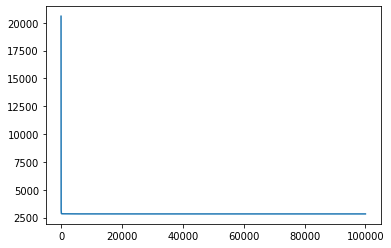

In [22]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [23]:
W, b

(array([ -30.62168293, -272.25451421,  528.84444912,  327.70268652,
        -581.01359318,  332.96244511,  -27.97630896,  139.28441238,
         665.07501086,   61.90596641]),
 151.43006888195177)

## (10) test 데이터에 대한 성능 확인하기

In [24]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2992.557729064415

## (11) 정답 데이터와 예측한 데이터 시각화하기

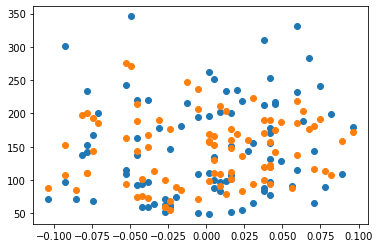

In [25]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()